# Used Car Price Prediction

### Name: Hadieh Abdulmajeed - QUID: 201905768
### Name: Hala - QUID: 
### Name: Sara - QUID: 

Using the kaggle craiglist used vehicles dataset to train machine learning models to predict used car price.

## 1. Importing relevant depenedencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

## 2. Reading dataset

In [2]:
vehicles = pd.read_csv("C:/files/courses/CMPS460/vehicles.csv")

In [3]:
#first 5 rows
vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


### 2.1 Select important columns

In [5]:
useful_columns = ['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 
                  'transmission','drive', 'type', 'paint_color', 'state', 'lat', 'long']
vehicles = vehicles[useful_columns]
vehicles.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN


## 3. General Analysis

In [6]:
# dataframe shape
vehicles.shape

(426880, 15)

In [7]:
# dataframe datatypes
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
 11  paint_color   296677 non-null  object 
 12  state         426880 non-null  object 
 13  lat           420331 non-null  float64
 14  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 48.9+ MB


In [9]:
# checking for missing values
missing_values = vehicles.isnull().sum()
missing_percent = vehicles.isnull().sum() * 100 / len(vehicles)
missing_value_df = pd.DataFrame({'number_missing': missing_values,
                                 'percent_missing': missing_percent})
missing_value_df.head(12)

,number_missing,percent_missing
price,0,0.000000
year,1205,0.282281
manufacturer,17646,4.133714
model,5277,1.236179
condition,174104,40.785232
cylinders,177678,41.622470
fuel,3013,0.705819
odometer,4400,1.030735
transmission,2556,0.598763
drive,130567,30.586347


In [10]:
# unique manufacturers
vehicles['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [11]:
# unique condition
vehicles['condition'].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [12]:
# unique fuel
vehicles['fuel'].value_counts()

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

In [13]:
# unique transmission
vehicles['transmission'].value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

In [14]:
# unique type
vehicles['type'].value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [15]:
# unique color
vehicles['paint_color'].value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

In [16]:
#descriptive statistics of the dataset
vehicles.describe()

,price,year,odometer,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


## 4. Data Visualization

### Used cars by manufacturer price comparasion

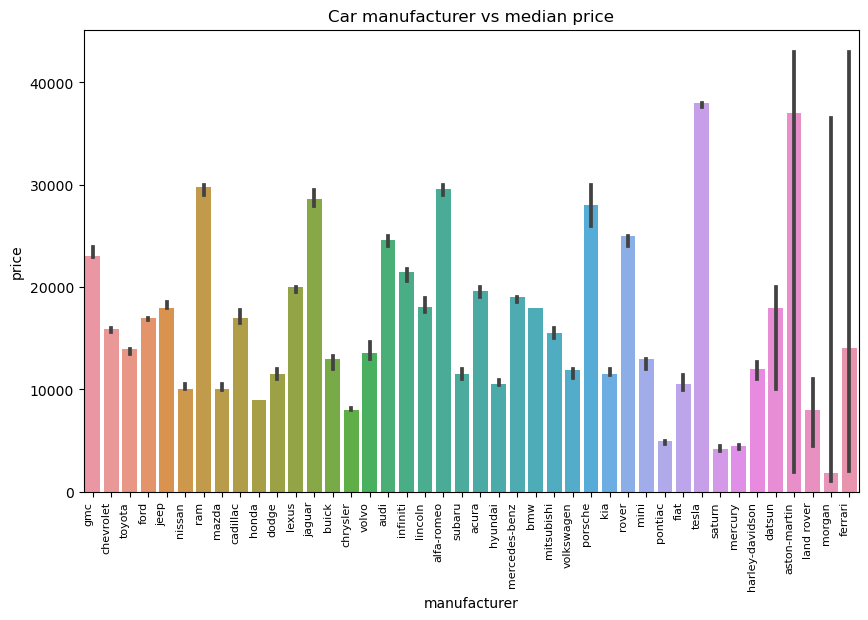

In [17]:
vehicles_price = vehicles[((vehicles["price"]<vehicles["price"].quantile(.99)))& ((vehicles["price"]>1))]

plt.figure(figsize=(10,6))
ax = sns.barplot(x='manufacturer', y='price', data=vehicles_price,estimator='median');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8,);
plt.ticklabel_format(style='plain', axis='y')
plt.title("Car manufacturer vs median price");

### Used cars by year
We will take the years from 1960's where the automobile gained popularity

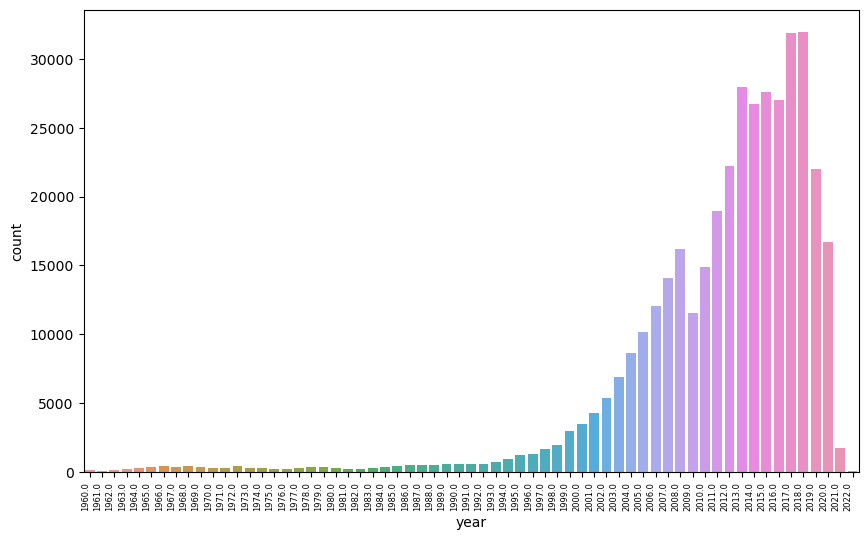

In [18]:
vehicles_year = vehicles_price[vehicles_price['year'] >= 1960]

plt.figure(figsize=(10,6))
ax = sns.countplot(x='year', data=vehicles_year);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

### Used cars by year price comparsion

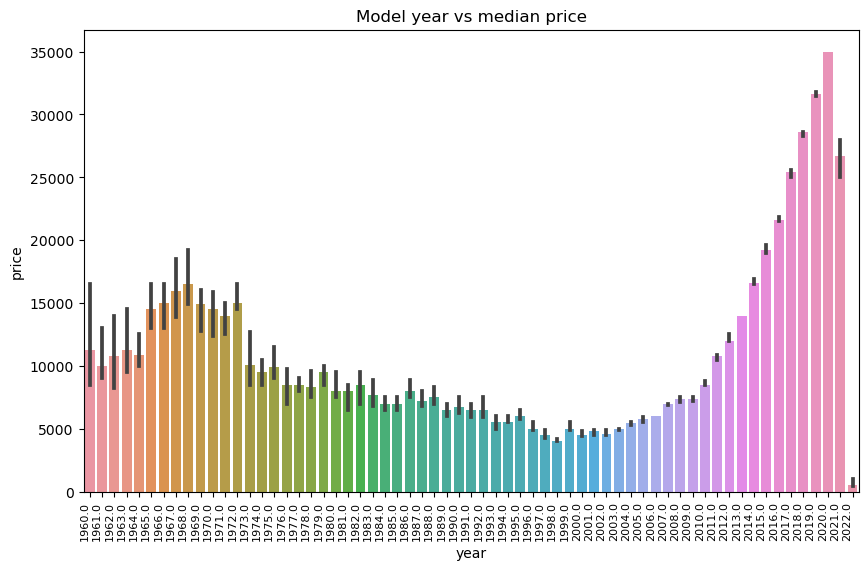

In [20]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='year', y='price', data=vehicles_year,estimator='median');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8,);
plt.ticklabel_format(style='plain', axis='y')
plt.title("Model year vs median price");

### Used cars by condition price comparsion

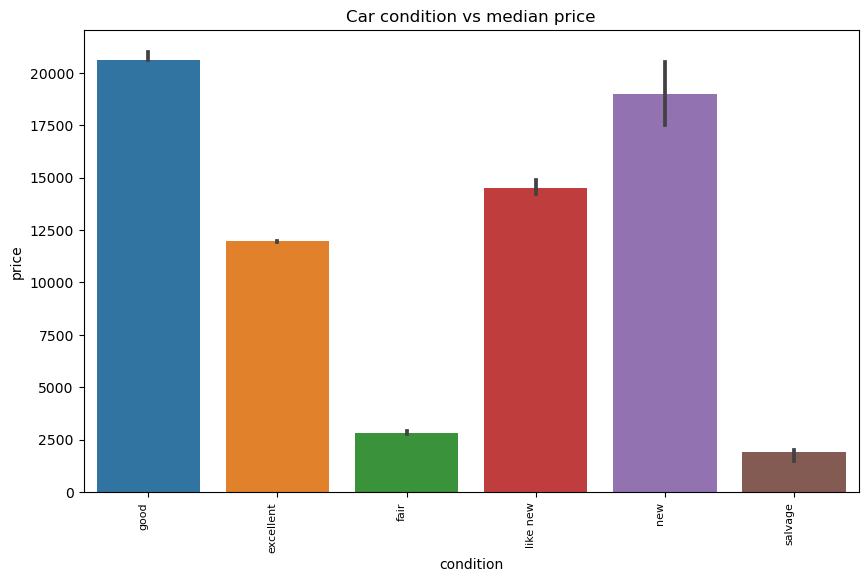

In [21]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='condition', y='price', data=vehicles_price,estimator='median');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8,);
plt.ticklabel_format(style='plain', axis='y')
plt.title("Car condition vs median price");

### Used cars by color price comparsion

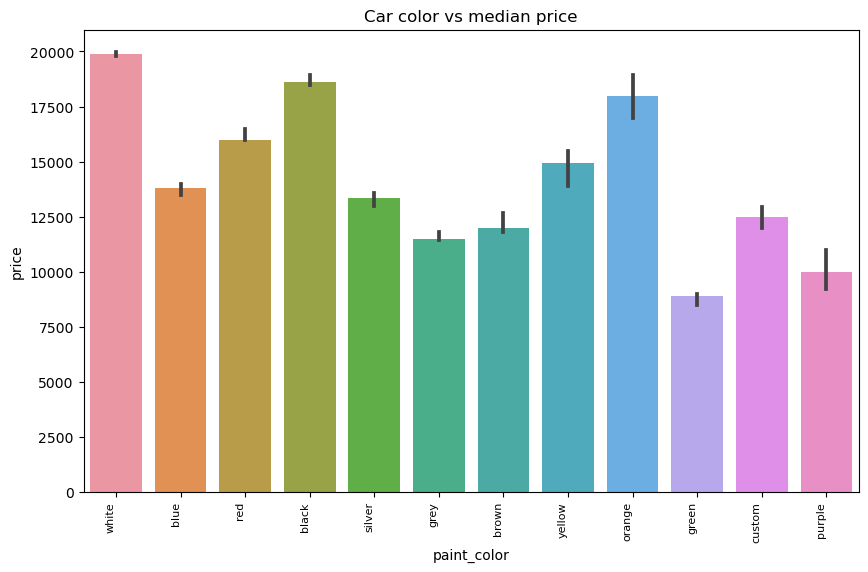

In [22]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='paint_color', y='price', data=vehicles_price,estimator='median');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8,);
plt.ticklabel_format(style='plain', axis='y')
plt.title("Car color vs median price");

### Used cars by type price comparsion

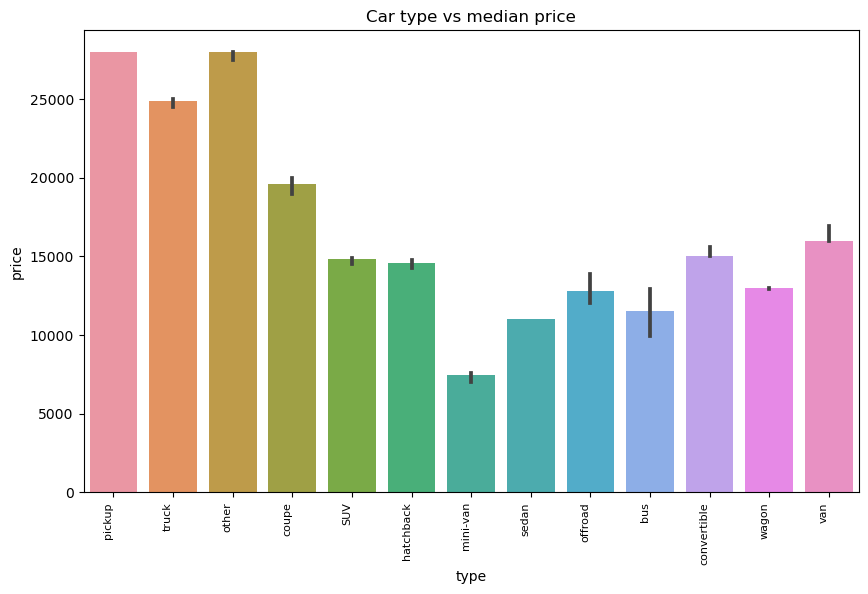

In [23]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='type', y='price', data=vehicles_price,estimator='median');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8,);
plt.ticklabel_format(style='plain', axis='y')
plt.title("Car type vs median price");

### Used cars by fuel price comparsion

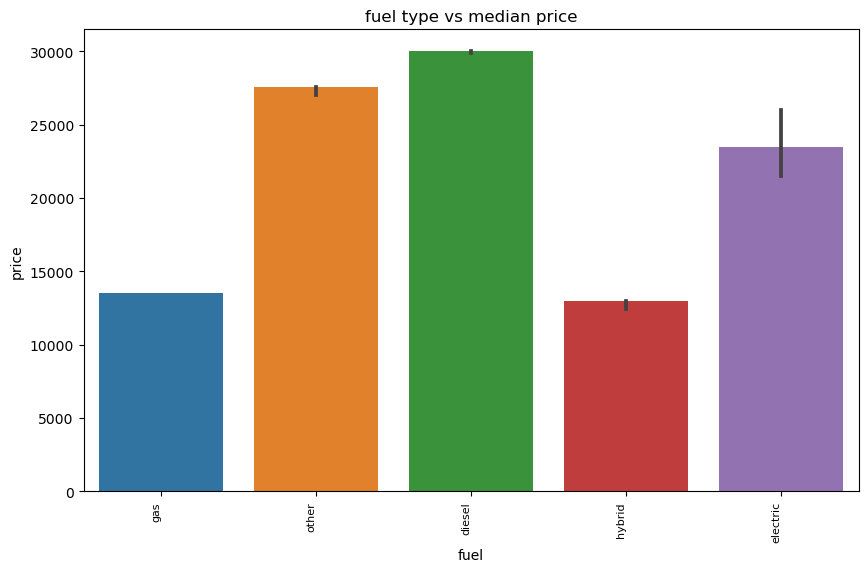

In [24]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='fuel', y='price', data=vehicles_price,estimator='median');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8,);
plt.ticklabel_format(style='plain', axis='y')
plt.title("fuel type vs median price");

### Used cars by number of cylinders price comparsion

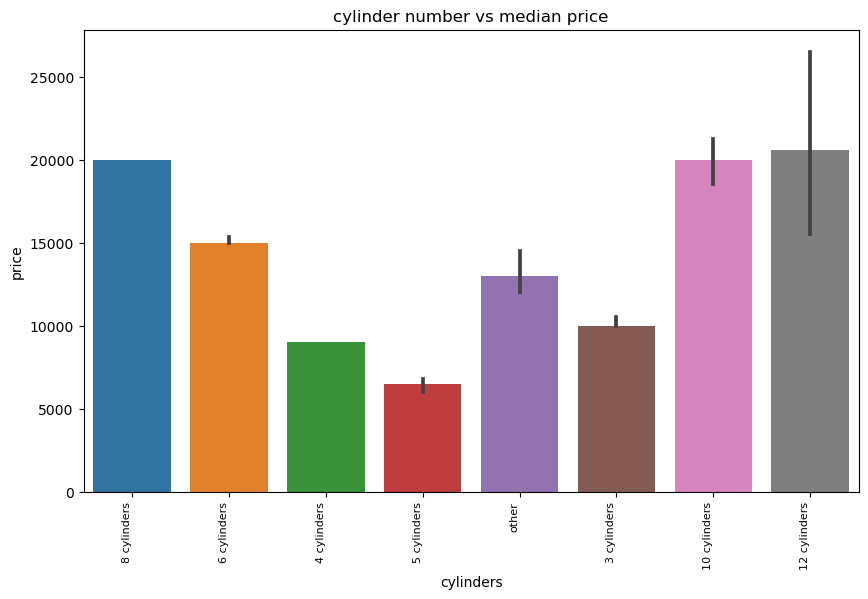

In [25]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='cylinders', y='price', data=vehicles_price,estimator='median');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8,);
plt.ticklabel_format(style='plain', axis='y')
plt.title("cylinder number vs median price");

### Used cars by transmission price comparsion

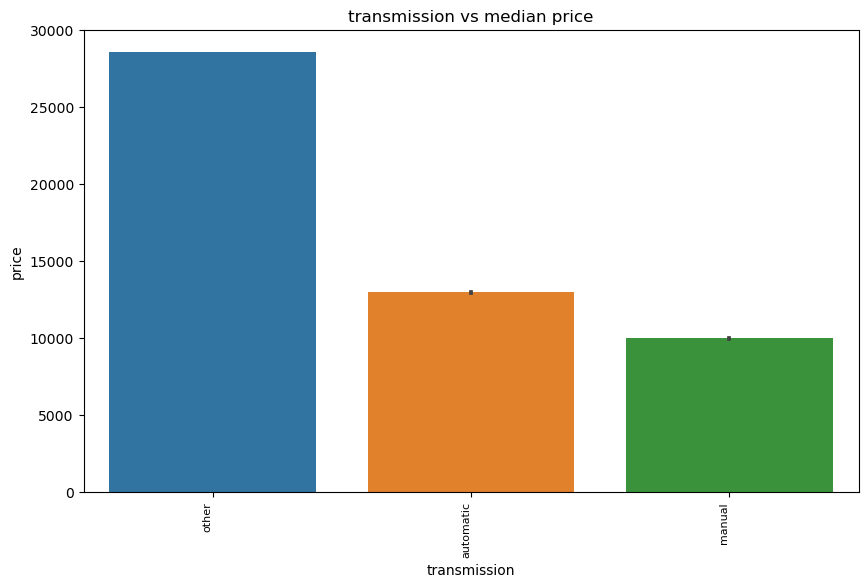

In [26]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='transmission', y='price', data=vehicles_price,estimator='median');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8,);
plt.ticklabel_format(style='plain', axis='y')
plt.title("transmission vs median price");

### How car milage affects price

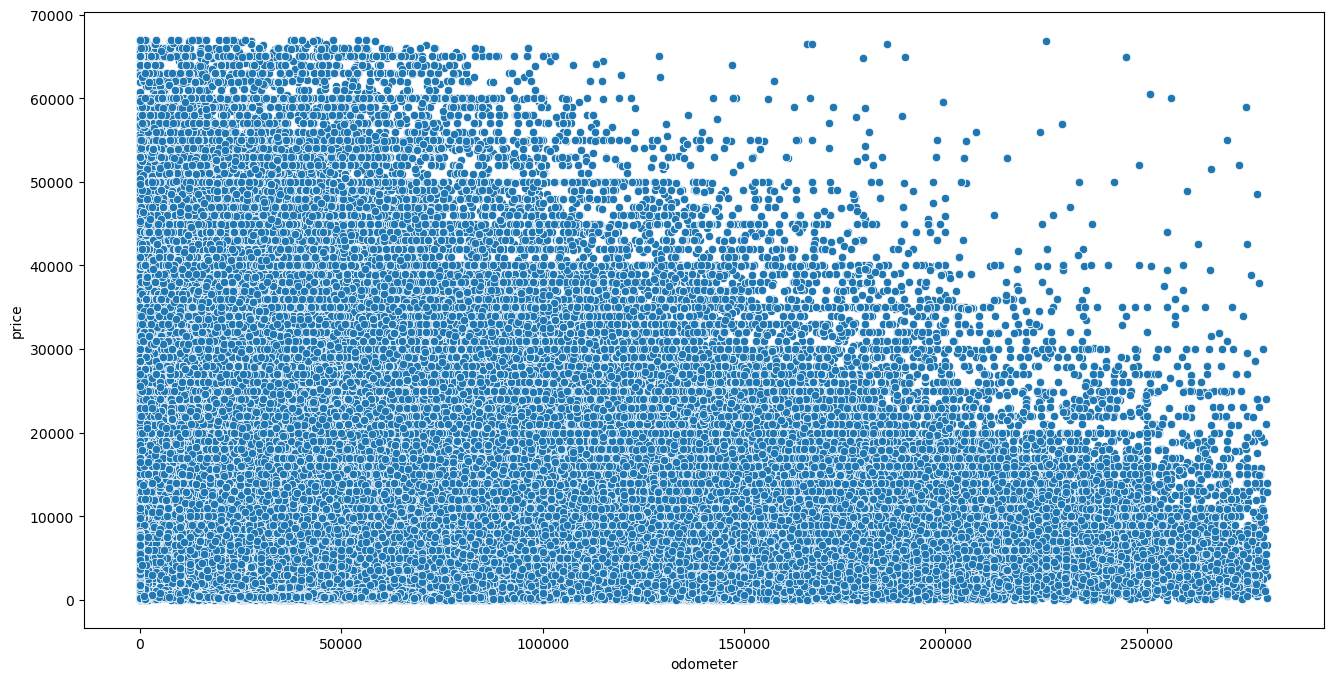

In [27]:
vehicles_odo = vehicles[(vehicles["odometer"]<vehicles["odometer"].quantile(.99)) & 
                          ((vehicles["price"]<vehicles["price"].quantile(.99)))& ((vehicles["price"]>1))]
plt.figure(figsize=(16,8))
sns.scatterplot(x = 'odometer', y = 'price', data = vehicles_odo)
plt.show()

### Used cars by state price comparsion

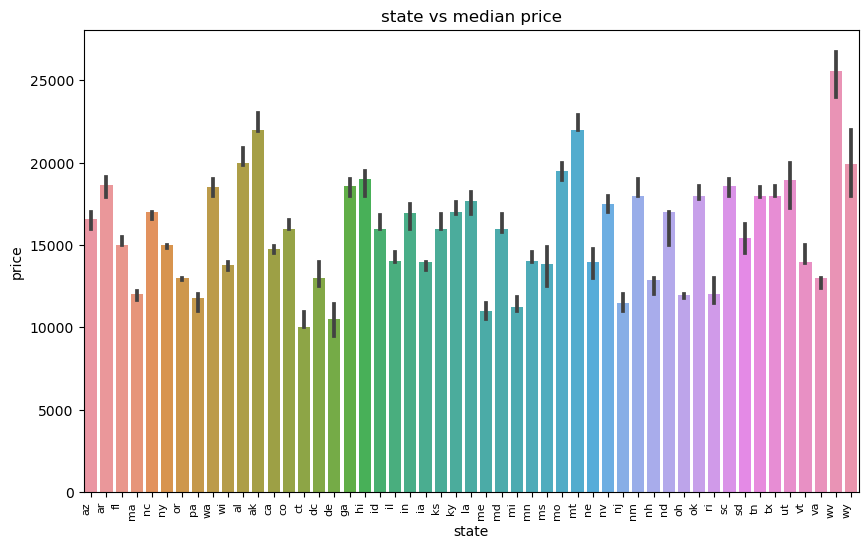

In [30]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='state', y='price', data=vehicles_price,estimator='median');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8,);
plt.ticklabel_format(style='plain', axis='y')
plt.title("state vs median price");

### Offer distribution in the US

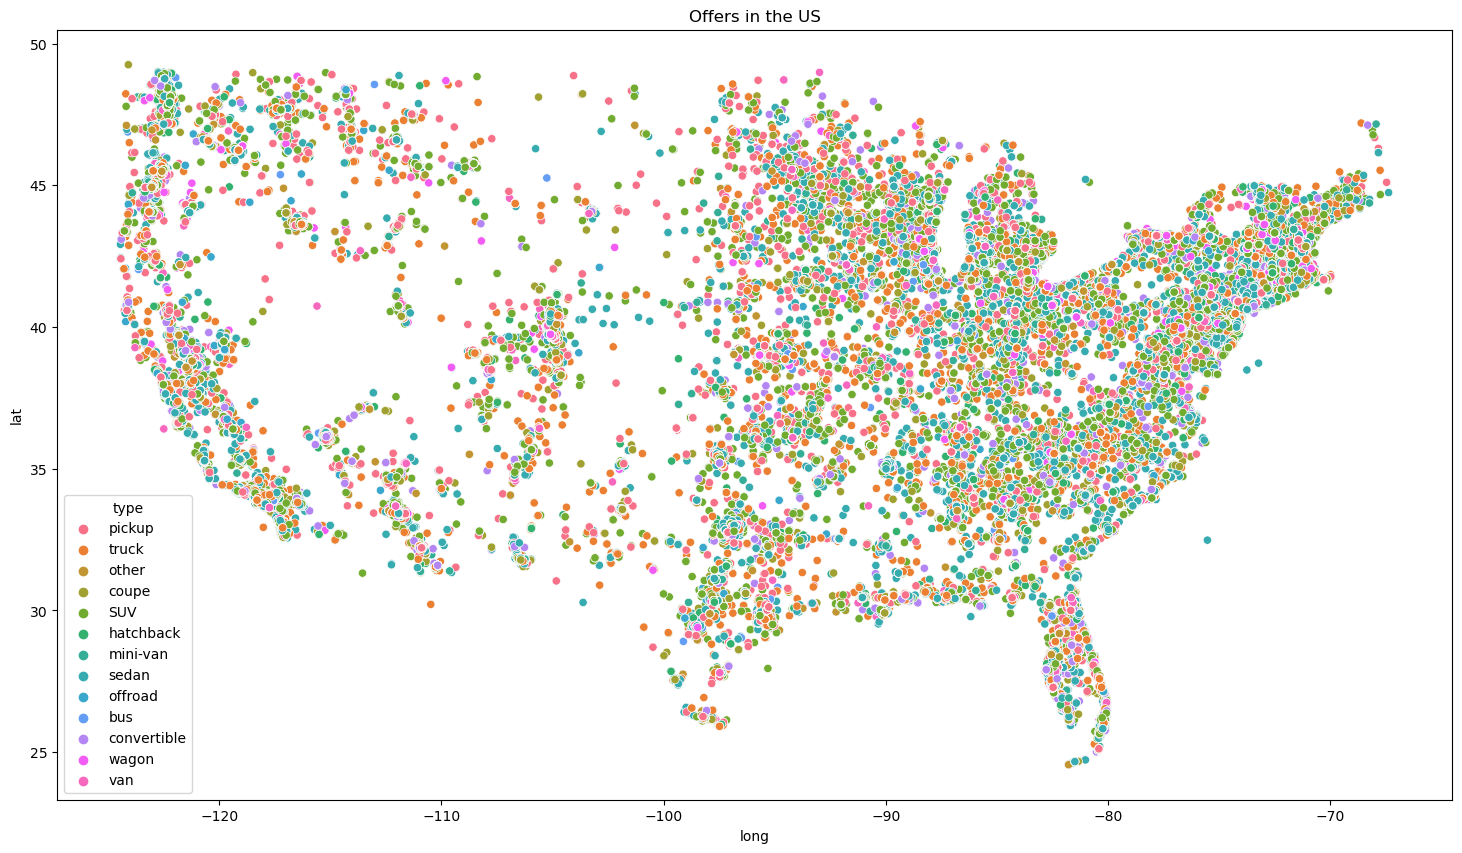

In [29]:
vehicles_local = vehicles_year[(vehicles_year['lat']>24) & (vehicles_year['lat']<50) 
                               & (vehicles_year['long']>-125) & (vehicles_year['long']<-65)]
plt.figure(figsize=(18,10))
plt.title('Offers in the US')
sns.scatterplot(data=vehicles_local, x="long",y="lat",hue='type')
plt.show()